In [1]:
import pandas as pd
import missingno as msno

In [2]:
df = pd.read_parquet('../do_not_commit/Datasets/Persist_System_DISC.pq')

In [3]:
df['RWB_EFFECTIVE_DATE'].max()

'2023-07-04'


# days_since_creation


In [4]:
# The number of days since the machine was created.
# This feature can be created from the Creation_Date0 field from system_DISC.

In [5]:
days_since_creation = df.groupby(['ItemKey', 'RWB_EFFECTIVE_DATE'])['Creation_Date0'].agg('max').reset_index()

In [6]:
days_since_creation['RWB_EFFECTIVE_DATE'] = pd.to_datetime(days_since_creation['RWB_EFFECTIVE_DATE']).dt.date
days_since_creation['Creation_Date0'] = pd.to_datetime(days_since_creation['Creation_Date0'])

In [7]:
days_since_creation['Creation_Date0_Days'] = days_since_creation['Creation_Date0'].apply(lambda x: x.date())
days_since_creation['Days Since Creation'] = days_since_creation['RWB_EFFECTIVE_DATE'] - days_since_creation['Creation_Date0_Days']

In [8]:
# days_since_creation.drop(columns='Creation_Date0', inplace=True)
days_since_creation['Days Since Creation'] = days_since_creation['Days Since Creation'].apply(lambda x: x.days)
days_since_creation

,ItemKey,RWB_EFFECTIVE_DATE,Creation_Date0,Creation_Date0_Days,Days Since Creation
0,16783564,2022-08-30,2018-06-07 14:53:07,2018-06-07,1545
1,16783564,2022-08-31,2018-06-07 14:53:07,2018-06-07,1546
2,16783564,2022-09-01,2018-06-07 14:53:07,2018-06-07,1547
3,16783564,2022-09-02,2018-06-07 14:53:07,2018-06-07,1548
4,16783564,2022-09-03,2018-06-07 14:53:07,2018-06-07,1549
...,...,...,...,...,...
2088306,2097181630,2023-07-03,2023-07-01 05:28:36,2023-07-01,2
2088307,2097181630,2023-07-04,2023-07-01 05:28:36,2023-07-01,3
2088308,2097181631,2023-07-02,2023-07-01 15:05:04,2023-07-01,1
2088309,2097181632,2023-07-03,2023-07-03 13:50:11,2023-07-03,0


In [9]:
# is_virtual_machine
# Identifies if the machine is a virtual machine or not.
# This can be pulled directly from the Is_Virtual_Macihine0.

# is_client
# Identifies if the machine is a SCCM client or not.
# This can be pulled directly from the Client0 attribute in Persist.System_DISC.

# is_active
# Identifies if the machine is active or not.
# This can be pulled directly from the Active0 attribute in Persist.System_DISC.

In [10]:
features = df.groupby(['ItemKey', 'RWB_EFFECTIVE_DATE']).agg(
    {
        'Is_Virtual_Machine0':'max',
        'Client0':'max',
        'Active0':'max'
    }
).reset_index()
features

,ItemKey,RWB_EFFECTIVE_DATE,Is_Virtual_Machine0,Client0,Active0
0,16783564,2022-08-30,True,1.0,1.0
1,16783564,2022-08-31,True,1.0,1.0
2,16783564,2022-09-01,True,1.0,1.0
3,16783564,2022-09-02,True,1.0,1.0
4,16783564,2022-09-03,True,1.0,1.0
...,...,...,...,...,...
2088306,2097181630,2023-07-03,NaN,NaN,NaN
2088307,2097181630,2023-07-04,NaN,NaN,NaN
2088308,2097181631,2023-07-02,NaN,NaN,NaN
2088309,2097181632,2023-07-03,NaN,NaN,NaN



# last_logon_date_age


In [11]:
# Number of days since a user has logged onto the machine.
# Calculate using the Last_Logon_Timestamp0 attribute from Persist.System_DISC
df['Last_Logon_Timestamp0'] = pd.to_datetime(df['Last_Logon_Timestamp0'])
days_since_last_logon = df.groupby(['ItemKey', 'RWB_EFFECTIVE_DATE'])['Last_Logon_Timestamp0'].agg('max').reset_index()

In [12]:
days_since_last_logon['RWB_EFFECTIVE_DATE'] = pd.to_datetime(days_since_last_logon['RWB_EFFECTIVE_DATE']).dt.date
days_since_last_logon['Last_Logon_Timestamp0_Date'] = days_since_last_logon['Last_Logon_Timestamp0'].apply(lambda x: x.date())

In [13]:
days_since_last_logon['Days Since Last Logon'] = days_since_last_logon['RWB_EFFECTIVE_DATE'] - days_since_last_logon['Last_Logon_Timestamp0_Date']
days_since_last_logon['Days Since Last Logon'] = days_since_last_logon['Days Since Last Logon'].apply(lambda x: x.days)
days_since_last_logon

,ItemKey,RWB_EFFECTIVE_DATE,Last_Logon_Timestamp0,Last_Logon_Timestamp0_Date,Days Since Last Logon
0,16783564,2022-08-30,2022-08-25 11:50:30,2022-08-25,5.0
1,16783564,2022-08-31,2022-08-25 11:50:30,2022-08-25,6.0
2,16783564,2022-09-01,2022-08-25 11:50:30,2022-08-25,7.0
3,16783564,2022-09-02,2022-08-25 11:50:30,2022-08-25,8.0
4,16783564,2022-09-03,2022-08-25 11:50:30,2022-08-25,9.0
...,...,...,...,...,...
2088306,2097181630,2023-07-03,2023-06-28 13:53:22,2023-06-28,5.0
2088307,2097181630,2023-07-04,2023-06-28 13:53:22,2023-06-28,6.0
2088308,2097181631,2023-07-02,2023-07-01 15:02:35,2023-07-01,1.0
2088309,2097181632,2023-07-03,2023-07-03 13:24:08,2023-07-03,0.0


In [14]:
days_since_creation['RWB_EFFECTIVE_DATE'] = days_since_creation['RWB_EFFECTIVE_DATE'].astype('str')
days_since_last_logon['RWB_EFFECTIVE_DATE'] = days_since_last_logon['RWB_EFFECTIVE_DATE'].astype('str')


# Join them together.


In [15]:
combined = features.merge(days_since_creation[['ItemKey', 'RWB_EFFECTIVE_DATE', 'Days Since Creation']], on=['ItemKey', 'RWB_EFFECTIVE_DATE'])
combined = combined.merge(days_since_last_logon[['ItemKey', 'RWB_EFFECTIVE_DATE', 'Days Since Last Logon']], on=['ItemKey', 'RWB_EFFECTIVE_DATE'])
combined

,ItemKey,RWB_EFFECTIVE_DATE,Is_Virtual_Machine0,Client0,Active0,Days Since Creation,Days Since Last Logon
0,16783564,2022-08-30,True,1.0,1.0,1545,5.0
1,16783564,2022-08-31,True,1.0,1.0,1546,6.0
2,16783564,2022-09-01,True,1.0,1.0,1547,7.0
3,16783564,2022-09-02,True,1.0,1.0,1548,8.0
4,16783564,2022-09-03,True,1.0,1.0,1549,9.0
...,...,...,...,...,...,...,...
2088306,2097181630,2023-07-03,NaN,NaN,NaN,2,5.0
2088307,2097181630,2023-07-04,NaN,NaN,NaN,3,6.0
2088308,2097181631,2023-07-02,NaN,NaN,NaN,1,1.0
2088309,2097181632,2023-07-03,NaN,NaN,NaN,0,0.0


<AxesSubplot:>

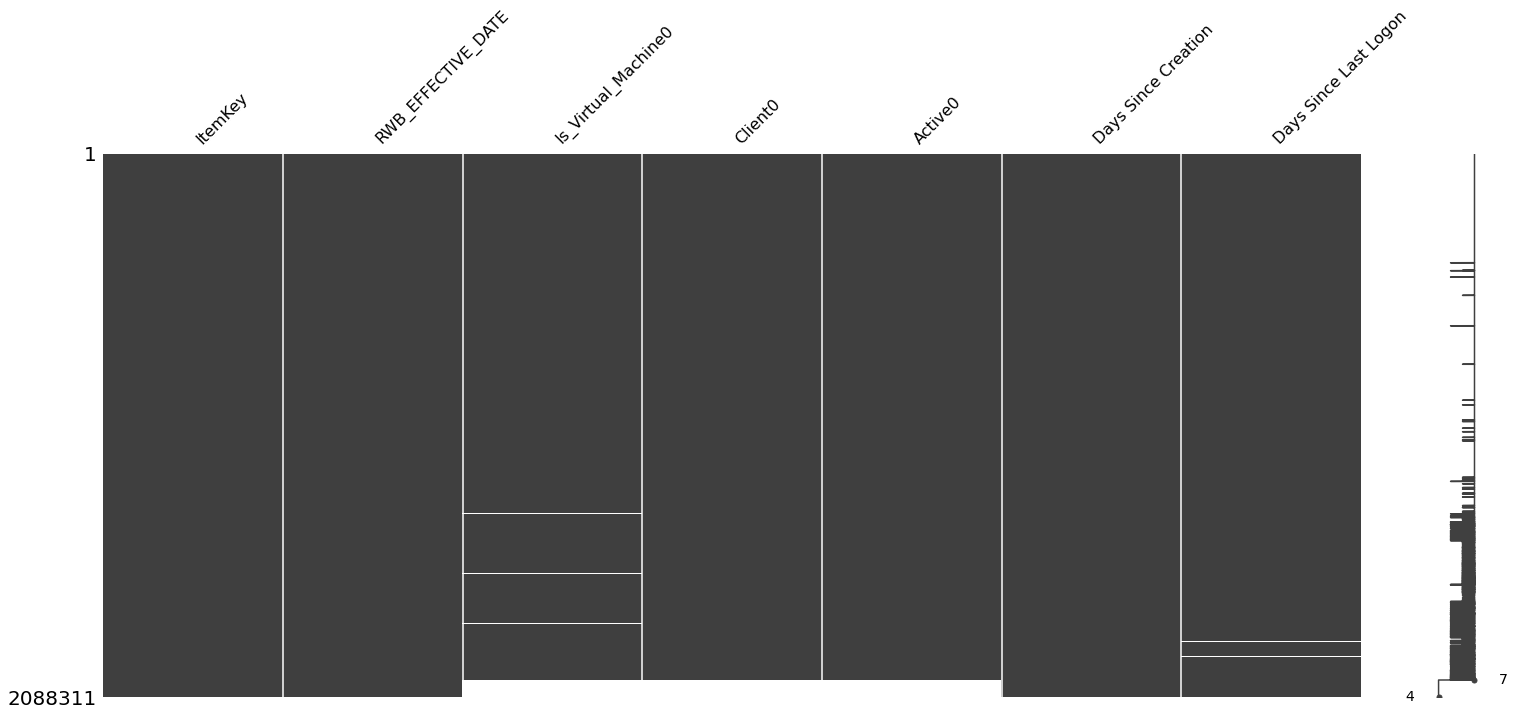

In [16]:
msno.matrix(combined)

In [17]:
# combined.to_parquet('../do_not_commit/FeatureDatasets/system_disc_features.pq')

In [18]:
combined['RWB_EFFECTIVE_DATE'].max()

'2023-07-04'